In [ ]:
Задание 1
Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [ ]:
import numpy as np
a = (np.array(range(1,101))).reshape(10, 10)
a = a[range(len(a)),::2][::2]
a

array([[ 1,  3,  5,  7,  9],
       [21, 23, 25, 27, 29],
       [41, 43, 45, 47, 49],
       [61, 63, 65, 67, 69],
       [81, 83, 85, 87, 89]])

Задание 2
Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [ ]:
%%time
dlina = 100_000_000
a = np.average(np.arange(0, dlina))
print(a)

49999999.5
CPU times: user 211 ms, sys: 240 ms, total: 452 ms
Wall time: 454 ms


In [ ]:
%%time

a = [i for i in range(0, 100000000)]
avg = sum(a)/len(a)
print(avg)

49999999.5
CPU times: user 6.73 s, sys: 6.39 s, total: 13.1 s
Wall time: 13.1 s


Задание 3
Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [ ]:
import pandas as pd
r = np.random.RandomState(1)
s=pd.Series(r.uniform(0, 10, 100))
x = s[s > 5].min()
a = (s[s==x].index.values).item(0)
a

67

Задание 4
Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.


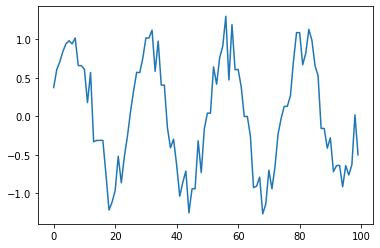

In [ ]:
import random
import matplotlib.pyplot as plt

a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

for i in range(10):
    a[random.randint(0, len(a) - 1)] = None

df = pd.DataFrame({'target':a})
df = df.fillna(method='ffill')

plt.plot(df.target.values)

## Задание 5

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [ ]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

# всех, кто старше 40
df1 = df[(df['возраст'] > 40)] 
df1

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
2,Аня,41,150000,0.87,жен


In [ ]:
df2 = df[(df['доход'] > df['доход'].mean())]
# всех, кто имеет доход выше среднего по датасету
df2

,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0


In [ ]:
df3 = df[(df['доход'] > df['доход'].mean()) & 
        (df['надежность клиента (0..1)'] < df['надежность клиента (0..1)'].mean())]
# всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету
df3

,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0


In [ ]:
df['важность клиента'] = df['доход'] * df['надежность клиента (0..1)']
df['возможная долгосрочность клиента'] = df['важность клиента'] * (df['возраст'].mean() - df['возраст'])
# важность клиента = доход * надежность
# возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)
df

,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


Задание 6
Посмотрите на блок Exploratory data analysis, используйте данные, кототрые вы загрузили в ходе его освоения. Ваша задача - вывести имена всех выживших детей и их количество

In [ ]:
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
df = df[(df['Age'] < 18) & (df['Survived']) > 0]['Name']
df, df.count()


(9           Mrs. Nicholas (Adele Achem) Nasser
 10              Miss. Marguerite Rut Sandstrom
 22                          Miss. Anna McGowan
 39                  Miss. Jamila Nicola-Yarred
 42     Miss. Simonne Marie Anne Andree Laroche
                         ...                   
 826     Mrs. Antoni (Selini Alexander) Yasbeck
 827             Master. George Sibley Richards
 849                   Miss. Mary Conover Lines
 865             Master. Harold Theodor Johnson
 871                   Miss. Adele Kiamie Najib
 Name: Name, Length: 65, dtype: object, 65)